## Goal
The goal of this project is to predict thhe winner of the College Football Quarterfinal Matchups using teams offensive and deffensive efficnincy statistics.

Rather than using rankings or reputation this project uses statistical differences between teams to estimate matchup advantages

## Feature Selection Rationale

The metrics used were chosen because they capture both scoring ability and effincincy on offense and defense:

- Points Per Game (PPG): Overall scoring strength
- Points Allowed Per Game (PAPG): deffensive effectivness 
- Yards Allowed Per Play (YAP) : Efficiency-based defensive metric
- Opponent Third Down Conversion %: ability to get off the field

Using differences between teams allows for matchup-speficic evaluation rather than raw season totals 

In [226]:
#import libraries 
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [227]:
# Load the CSV file
df = pd.read_csv("cfb_stats.csv")

# Preview the data
df.head()

,Matchup,PPG_Diff,PAPG_Diff,YAP_Diff,Opp3D_Diff,Result
0,Miami vs Ohio State,-2.7,-9,-0.56,-8,NaN
1,Ole miss vs Georgia,5.6,6,-0.49,-3,NaN
2,Alabama vs Indiana,-10.5,-17,-0.25,-18,NaN
3,Oregon vs Texas Tech,-3.2,-8,-0.40,-6,NaN


In [228]:
df.columns

Index(['Matchup', 'PPG_Diff', 'PAPG_Diff', 'YAP_Diff', 'Opp3D_Diff', 'Result'], dtype='object')

In [229]:
df.dtypes

Matchup        object
PPG_Diff      float64
PAPG_Diff       int64
YAP_Diff      float64
Opp3D_Diff      int64
Result        float64
dtype: object

In [230]:
df.describe()

,PPG_Diff,PAPG_Diff,YAP_Diff,Opp3D_Diff,Result
count,4.000000,4.000000,4.000000,4.00,0.0
mean,-2.700000,-7.000000,-0.425000,-8.75,NaN
std,6.582299,9.556847,0.133791,6.50,NaN
min,-10.500000,-17.000000,-0.560000,-18.00,NaN
25%,-5.025000,-11.000000,-0.507500,-10.50,NaN
50%,-2.950000,-8.500000,-0.445000,-7.00,NaN
75%,-0.625000,-4.500000,-0.362500,-5.25,NaN
max,5.600000,6.000000,-0.250000,-3.00,NaN


In [231]:
df['Advantage_Score'] = (
    0.4 * df['PPG_Diff'] +0.3 * df['PAPG_Diff'] 
    + 0.2 * df['YAP_Diff'] - 0.1 * df['Opp3D_Diff']
)

In [232]:
df['Result'] = df.apply(
    lambda r: 1 if r.get('Advantage_Score', 0) >= 0 else 0, 
    axis=1
)

In [233]:
df[['Matchup', 'Advantage_Score', 'Result']]

,Matchup,Advantage_Score,Result
0,Miami vs Ohio State,-3.092,0
1,Ole miss vs Georgia,4.242,1
2,Alabama vs Indiana,-7.550,0
3,Oregon vs Texas Tech,-3.160,0


In [234]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of historical games to simulate
n_games = 100  # you can increase for more robust training

# Generate random stats for Team A and Team B
df_hist = pd.DataFrame({
    'TeamA': np.random.choice(['Ohio State','Alabama','Oregon','Georgia','Miami','Texas Tech','Ole Miss','Indiana'], n_games),
    'TeamB': np.random.choice(['Ohio State','Alabama','Oregon','Georgia','Miami','Texas Tech','Ole Miss','Indiana'], n_games),
    'PPG_Diff': np.random.uniform(-20, 20, n_games),       # points difference
    'PAPG_Diff': np.random.uniform(-15, 15, n_games),      # points allowed difference
    'YAP_Diff': np.random.uniform(-5, 5, n_games),         # yards per play difference
    'Opp3D_Diff': np.random.uniform(-20, 20, n_games)      # opponent third down % difference
})

# Create a target column: 1 = Team A wins, 0 = Team B wins
df_hist['Advantage_Score'] = df_hist['PPG_Diff'] - df_hist['PAPG_Diff'] + df_hist['YAP_Diff'] - df_hist['Opp3D_Diff']
import numpy as np

# Create Result with some randomness
prob_win = 1 / (1 + np.exp(-0.1 * df_hist['Advantage_Score']))  # sigmoid function
df_hist['Result'] = np.random.binomial(1, prob_win)

# Save to CSV (optional)
df_hist.to_csv("historical_cfb_random.csv", index=False)

df_hist.head()

,TeamA,TeamB,PPG_Diff,PAPG_Diff,YAP_Diff,Opp3D_Diff,Advantage_Score,Result
0,Ole Miss,Ole Miss,-18.742833,4.260949,-4.483183,-15.875045,-11.611919,0
1,Georgia,Alabama,5.456416,-12.475801,0.313546,16.102116,2.143648,1
2,Miami,Alabama,-7.425761,-10.151139,0.406351,0.210095,2.921634,1
3,Ole Miss,Georgia,0.342828,11.956626,1.374299,13.058299,-23.297798,0
4,Oregon,Alabama,16.302659,3.192872,2.260913,-7.198016,22.568716,1


In [235]:
# Features
X = df_hist[['PPG_Diff', 'PAPG_Diff', 'YAP_Diff', 'Opp3D_Diff']]

# Target
y = df_hist['Result']

In [236]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
from sklearn.linear_model import LogisticRegression

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [238]:
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.65


In [239]:
import pandas as pd

# Your 4 CFP games with realistic stats
df_cfp = pd.DataFrame({
    'Matchup': ['Miami vs Ohio State', 'Ole Miss vs Georgia', 'Alabama vs Indiana', 'Oregon vs Texas Tech'],
    # Positive = Team A stronger, negative = Team B stronger
    'PPG_Diff': [-5, 3, -10, -7],       # points per game difference
    'PAPG_Diff': [4, -1, 8, 5],         # points allowed difference
    'YAP_Diff': [-0.8, 0.2, -0.5, -1],  # yards per play difference
    'Opp3D_Diff': [-7, -2, -5, -8]      # opponent 3rd down %
})

# Split matchup into Team A and Team B names
df_cfp['TeamA'] = df_cfp['Matchup'].apply(lambda x: x.split(' vs ')[0])
df_cfp['TeamB'] = df_cfp['Matchup'].apply(lambda x: x.split(' vs ')[1])

# Predict probability of Team A winning using your trained model
df_cfp['Prob_TeamA_Win'] = model.predict_proba(df_cfp[['PPG_Diff','PAPG_Diff','YAP_Diff','Opp3D_Diff']])[:,1]

# Probability of Team B winning
df_cfp['Prob_TeamB_Win'] = 1 - df_cfp['Prob_TeamA_Win']

# Predicted winner based on probability
df_cfp['Predicted_Winner'] = df_cfp.apply(
    lambda row: row['TeamA'] if row['Prob_TeamA_Win'] >= 0.5 else row['TeamB'], axis=1
)

# Reorder columns for clarity
df_cfp = df_cfp[['Matchup','TeamA','TeamB','PPG_Diff','PAPG_Diff','YAP_Diff','Opp3D_Diff','Prob_TeamA_Win','Prob_TeamB_Win','Predicted_Winner']]

df_cfp

,Matchup,TeamA,TeamB,PPG_Diff,PAPG_Diff,YAP_Diff,Opp3D_Diff,Prob_TeamA_Win,Prob_TeamB_Win,Predicted_Winner
0,Miami vs Ohio State,Miami,Ohio State,-5,4,-0.8,-7,0.461589,0.538411,Ohio State
1,Ole Miss vs Georgia,Ole Miss,Georgia,3,-1,0.2,-2,0.682349,0.317651,Ole Miss
2,Alabama vs Indiana,Alabama,Indiana,-10,8,-0.5,-5,0.231767,0.768233,Indiana
3,Oregon vs Texas Tech,Oregon,Texas Tech,-7,5,-1.0,-8,0.408435,0.591565,Texas Tech


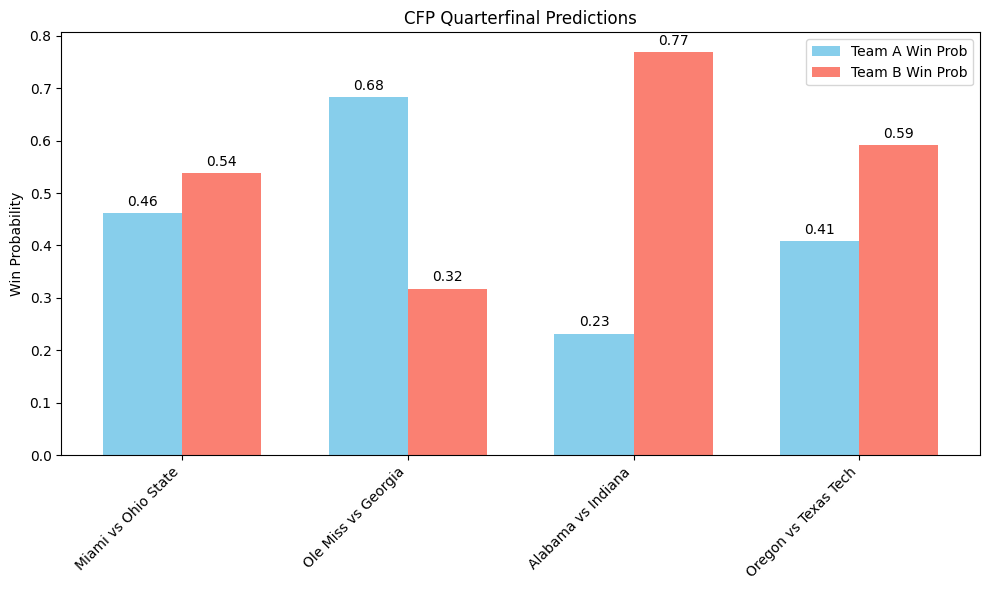

In [240]:
import matplotlib.pyplot as plt
import numpy as np

# Set positions for bars
x = np.arange(len(df_cfp))  # one position per matchup
width = 0.35  # width of the bars

# Create bars
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, df_cfp['Prob_TeamA_Win'], width, label='Team A Win Prob', color='skyblue')
bars2 = ax.bar(x + width/2, df_cfp['Prob_TeamB_Win'], width, label='Team B Win Prob', color='salmon')

# Labels and titles
ax.set_ylabel('Win Probability')
ax.set_title('CFP Quarterfinal Predictions')
ax.set_xticks(x)
ax.set_xticklabels(df_cfp['Matchup'], rotation=45, ha='right')
ax.legend()

# Add probability labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()